# Images Classification Implementation

### Import the required libraries

In [8]:
import torch
import argparse
import torch.nn as nn
import torch.optim as optim
import argparse
import cv2
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from model import build_model
from utils import save_model, save_plots
from datasets import train_loader, valid_loader, dataset
from tqdm.notebook import tqdm

Classes: ['cloudy', 'desert', 'green_area', 'water']
Total number of images: 5631
Total training images: 4505
Total valid_images: 1126


### Load the weights for Reset Model

In [30]:
lr = 0.001
epochs = 20
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"computation device: {device}\n")

computation device: cuda



In [31]:
model = build_model(
    pretrained=True, fine_tune=False, num_classes=len(dataset.classes)).to(device)
   
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")

total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.\n")

[INFO]: Loading pre-trained weights
[INFO]: Freezing hidden layers...
21,286,724 total parameters.
2,052 training parameters.



In [32]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

# loss function
criterion = nn.CrossEntropyLoss()

### Training and Validation Functions

In [38]:
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # forward pass
        outputs = model(image)
        # calculate the loss
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # backpropagation
        loss.backward()
        # update the optimizer parameters
        optimizer.step()
    
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc

In [41]:
def validate(model, testloader, criterion, class_names):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    
    # we need two lists to keep track of class-wise accuracy
    class_correct = list(0. for i in range(len(class_names)))
    class_total = list(0. for i in range(len(class_names)))
    
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # forward pass
            outputs = model(image)
            # calculate the loss
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
            
            # calculate the accuracy for each class
            correct  = (preds == labels).squeeze()
            for i in range(len(preds)):
                label = labels[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
        
    # loss and accuracy for the complete epoch
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    
    # print the accuracy for each class after every epoch
    print('\n')
    for i in range(len(class_names)):
        print(f"Accuracy of class {class_names[i]}: {100*class_correct[i]/class_total[i]}")
    print('\n')
        
    return epoch_loss, epoch_acc

### Train for 20 Epochs

Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 95.57522123893806
Accuracy of class green_area: 96.53979238754326
Accuracy of class water: 93.8566552901024


Training loss: 0.057, training acc: 98.180
Validation loss: 0.142, validation acc: 96.359
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.37106918238993
Accuracy of class desert: 92.92035398230088
Accuracy of class green_area: 97.57785467128028
Accuracy of class water: 83.2764505119454


Training loss: 0.049, training acc: 98.557
Validation loss: 0.208, validation acc: 93.428
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 96.90265486725664
Accuracy of class green_area: 96.88581314878893
Accuracy of class water: 84.98293515358361


Training loss: 0.048, training acc: 98.424
Validation loss: 0.189, validation acc: 94.405
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 98.23008849557522
Accuracy of class green_area: 95.50173010380622
Accuracy of class water: 91.46757679180887


Training loss: 0.047, training acc: 98.690
Validation loss: 0.162, validation acc: 96.004
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 98.74213836477988
Accuracy of class desert: 97.78761061946902
Accuracy of class green_area: 89.96539792387543
Accuracy of class water: 96.24573378839591


Training loss: 0.060, training acc: 98.091
Validation loss: 0.161, validation acc: 95.648
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 98.11320754716981
Accuracy of class desert: 98.67256637168141
Accuracy of class green_area: 96.88581314878893
Accuracy of class water: 88.39590443686006


Training loss: 0.049, training acc: 98.313
Validation loss: 0.159, validation acc: 95.382
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 97.34513274336283
Accuracy of class green_area: 97.92387543252595
Accuracy of class water: 91.12627986348123


Training loss: 0.049, training acc: 98.402
Validation loss: 0.143, validation acc: 96.359
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 97.78761061946902
Accuracy of class green_area: 93.77162629757785
Accuracy of class water: 93.8566552901024


Training loss: 0.040, training acc: 98.912
Validation loss: 0.161, validation acc: 96.092
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 92.47787610619469
Accuracy of class green_area: 96.19377162629758
Accuracy of class water: 91.80887372013652


Training loss: 0.039, training acc: 98.690
Validation loss: 0.163, validation acc: 95.115
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 96.90265486725664
Accuracy of class green_area: 96.19377162629758
Accuracy of class water: 89.419795221843


Training loss: 0.044, training acc: 98.468
Validation loss: 0.162, validation acc: 95.382
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 97.48427672955975
Accuracy of class desert: 98.67256637168141
Accuracy of class green_area: 87.5432525951557
Accuracy of class water: 93.51535836177474


Training loss: 0.043, training acc: 98.513
Validation loss: 0.178, validation acc: 94.139
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 98.42767295597484
Accuracy of class desert: 98.67256637168141
Accuracy of class green_area: 88.23529411764706
Accuracy of class water: 96.24573378839591


Training loss: 0.041, training acc: 98.602
Validation loss: 0.162, validation acc: 95.293
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 98.23008849557522
Accuracy of class green_area: 86.85121107266436
Accuracy of class water: 92.83276450511946


Training loss: 0.044, training acc: 98.513
Validation loss: 0.183, validation acc: 94.139
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 97.34513274336283
Accuracy of class green_area: 94.80968858131487
Accuracy of class water: 92.15017064846417


Training loss: 0.042, training acc: 98.668
Validation loss: 0.157, validation acc: 95.826
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 98.67256637168141
Accuracy of class green_area: 92.38754325259515
Accuracy of class water: 95.56313993174061


Training loss: 0.044, training acc: 98.446
Validation loss: 0.143, validation acc: 96.359
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 97.78761061946902
Accuracy of class green_area: 96.53979238754326
Accuracy of class water: 93.51535836177474


Training loss: 0.039, training acc: 98.468
Validation loss: 0.125, validation acc: 96.714
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 96.90265486725664
Accuracy of class green_area: 95.15570934256056
Accuracy of class water: 92.83276450511946


Training loss: 0.038, training acc: 98.713
Validation loss: 0.149, validation acc: 96.004
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 98.74213836477988
Accuracy of class desert: 98.67256637168141
Accuracy of class green_area: 89.27335640138408
Accuracy of class water: 94.53924914675768


Training loss: 0.041, training acc: 98.713
Validation loss: 0.154, validation acc: 95.204
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.37106918238993
Accuracy of class desert: 97.78761061946902
Accuracy of class green_area: 96.19377162629758
Accuracy of class water: 88.73720136518772


Training loss: 0.040, training acc: 98.602
Validation loss: 0.163, validation acc: 95.471
--------------------------------------------------
Training


  0%|          | 0/71 [00:00<?, ?it/s]

Validation


  0%|          | 0/18 [00:00<?, ?it/s]



Accuracy of class cloudy: 99.05660377358491
Accuracy of class desert: 97.78761061946902
Accuracy of class green_area: 97.2318339100346
Accuracy of class water: 91.46757679180887


Training loss: 0.042, training acc: 98.557
Validation loss: 0.133, validation acc: 96.359
--------------------------------------------------
TRAINING COMPLETE


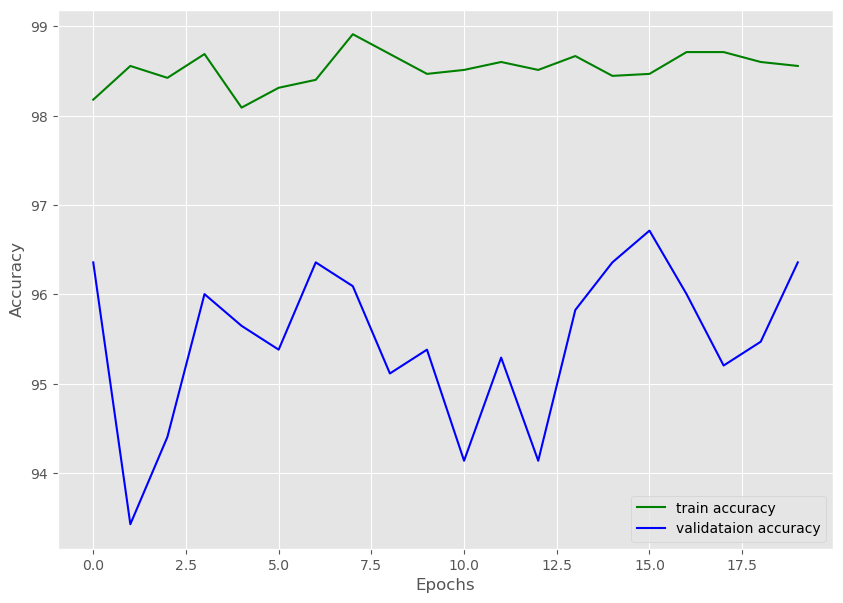

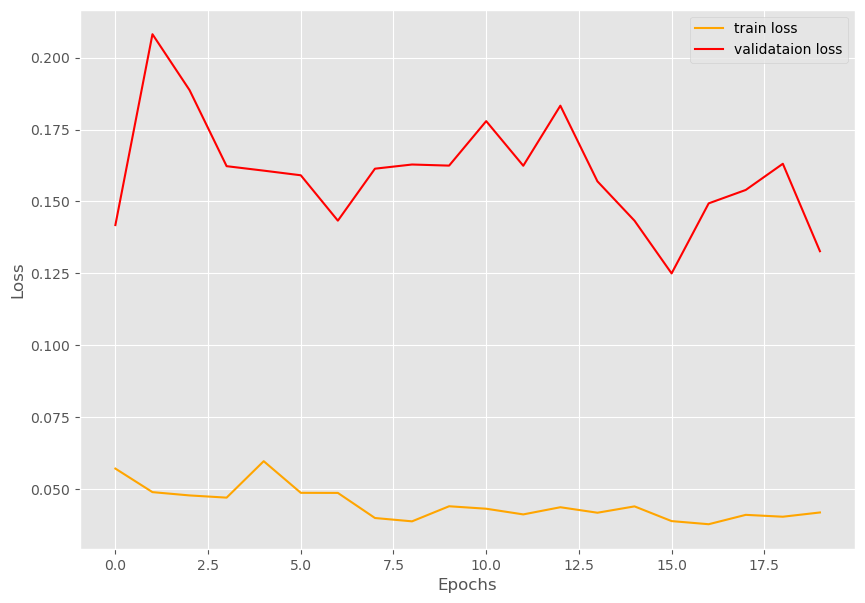

In [42]:
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# start the training
for epoch in range(epochs):
    #print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,  
                                                 criterion, dataset.classes)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
# save the trained model weights
save_model(epochs, model, optimizer, criterion)
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

### Inference

In [4]:
import torch
import cv2
import torchvision.transforms as transforms
from model import build_model

In [5]:
device = 'cpu'

In [6]:
# list containing all the labels
labels = ['cloudy', 'desert', 'green_area', 'water']
# initialize the model and load the trained weights
model = build_model(
    pretrained=False, fine_tune=False, num_classes=4
).to(device)

print('[INFO]: Loading custom-trained weights...')
checkpoint = torch.load('outputs/model.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# define preprocess transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
]) 

[INFO]: Not loading pre-trained weights
[INFO]: Freezing hidden layers...
[INFO]: Loading custom-trained weights...


In [17]:
def inference(input):
# read and preprocess the image
    image = cv2.imread(input)
    # get the ground truth class
    gt_class = input.split('/')[-1].split('.')[0]
    orig_image = image.copy()
    # convert to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = transform(image)
    # add batch dimension
    image = torch.unsqueeze(image, 0)
    with torch.no_grad():
        outputs = model(image.to(device))
    output_label = torch.topk(outputs, 1)
    pred_class = labels[int(output_label.indices)]
    cv2.putText(orig_image, 
        f"GT: {gt_class}",
        (10, 25),
        cv2.FONT_HERSHEY_SIMPLEX, 
        1, (0, 255, 0), 2, cv2.LINE_AA
    )
    cv2.putText(orig_image, 
        f"Pred: {pred_class}",
        (10, 55),
        cv2.FONT_HERSHEY_SIMPLEX, 
        1, (0, 0, 255), 2, cv2.LINE_AA
    )
    print(f"GT: {gt_class}, pred: {pred_class}")
    #image = cv2.imshow('Result', orig_image)
    rgb_image = cv2.cvtColor(orig_image,cv2.COLOR_BGR2RGB)
    fig = plt.figure()
    plt.axis('off')
    plt.grid(b=None)
    plt.imshow(rgb_image)
    cv2.imwrite(f"outputs/{gt_class}.png",
        orig_image)

GT: cloudy, pred: cloudy


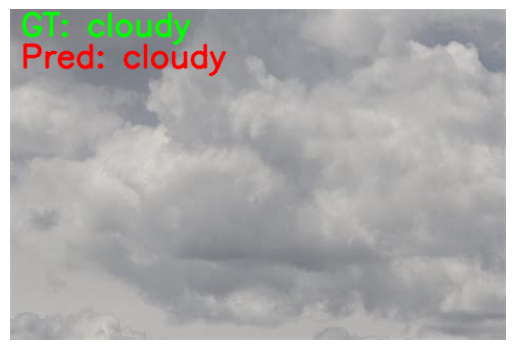

In [18]:
inference(input='input/test_data/cloudy.jpeg')

GT: desert, pred: desert


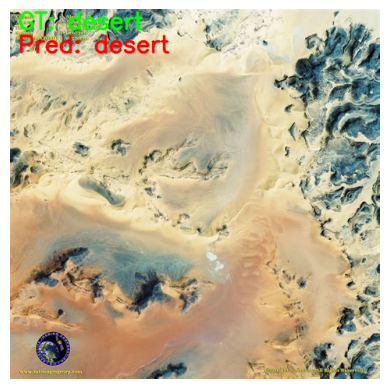

In [21]:
inference(input='input/test_data/desert.jpeg')